In [2]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=426904461757c92d47be513dc928024dfe2233b15fd960b8c36a9ba68471c931
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [10]:
d=pd.read_csv('hiring.csv')
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
d.experience=d.experience.fillna("zero")

In [18]:
import math
median_test_score=math.floor(d['test_score(out of 10)'].mean())
median_test_score

7

In [20]:
d['test_score(out of 10)']=d['test_score(out of 10)'].fillna(median_test_score)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


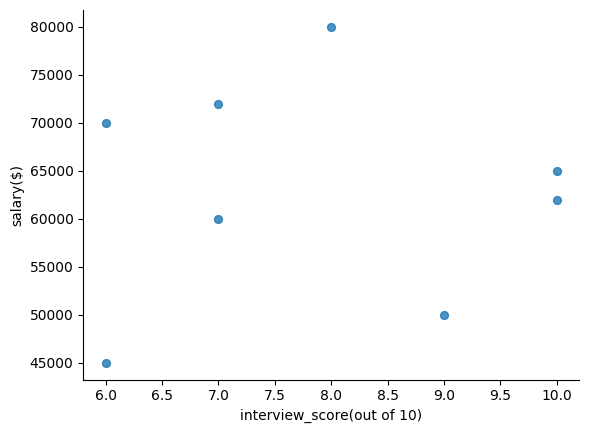

In [21]:
# @title interview_score(out of 10) vs salary($)

from matplotlib import pyplot as plt
d.plot(kind='scatter', x='interview_score(out of 10)', y='salary($)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
d.experience=d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [26]:
reg=linear_model.LinearRegression()
reg.fit(d[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], d['salary($)'])

LinearRegression()

In [31]:
reg.predict([[2,9,9]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60156.31447034])